#**Data_Set Extractor**

In [ ]:
import cv2
import sqlite3
import os
import matplotlib.pyplot as plt

In [ ]:
# Video path
video_path = "My_video.mp4"

In [ ]:
import os

# Name of the main folder
main_folder_name = "data"

# Path to the main folder
main_folder_path = os.path.join(os.getcwd(), main_folder_name)

# Create the main folder if it doesn't exist
if not os.path.exists(main_folder_path):
    os.mkdir(main_folder_path)

# Subfolder names
subfolders = ["male", "female"]

# Create subfolders within the main folder
for folder in subfolders:
    folder_path = os.path.join(main_folder_path, folder)
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
        print(f"Folder '{folder}' created in '{main_folder_name}' folder.")
    else:
        print(f"Folder '{folder}' already exists in '{main_folder_name}' folder.")


Folder 'male' created in 'data' folder.
Folder 'female' created in 'data' folder.


In [ ]:
def capture_frames(video_path, time_intervals):
    frames = []
    cap = cv2.VideoCapture(video_path)

    for interval in time_intervals:
        frame_number = int(interval * cap.get(cv2.CAP_PROP_FPS))
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)

    cap.release()
    return frames

In [ ]:
# Time intervals for frame capture
time_intervals = [0, 10, 15, 20,30]

frames = capture_frames(video_path, time_intervals)

In [ ]:
count = 0

for frame in frames:
    # Detect faces in the frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray)

    for (x, y, w, h) in faces:
        # Extract the face from the frame
        face_image = frame[y:y+h, x:x+w]

        # Generate a unique filename for the face image in the DataSet folder
        filename = os.path.join(main_folder_path, f'face_{count}.jpg')

        # Save the face image to the DataSet folder
        cv2.imwrite(filename, face_image)

        # Get the absolute path of the saved face image
        image_path = os.path.abspath(filename)

        # Add the image path to the database
        cursor.execute('INSERT INTO faces (image_path) VALUES (?)', (image_path,))
        conn.commit()

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        count += 1
        # Display the frame with face detection
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Frame with Face Detection: {count}')
    plt.axis('off')
    plt.show()

# **Connect to the database**



In [ ]:
# Connect to the database
conn = sqlite3.connect('faces2.db')
cursor = conn.cursor()

# Create the faces table if it doesn't exist
cursor.execute('CREATE TABLE IF NOT EXISTS faces (id INTEGER PRIMARY KEY, image_path TEXT)')

In [ ]:
# Initialize the face detector
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# **Import necessary modules first.**

---



In [ ]:

import cv2
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

# **Labeling Data **

In [ ]:
import cv2
import os

data_path='data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'male': 0, 'female': 1}
['male', 'female']
[0, 1]


# Saving Data in List

In [ ]:
img_size=32
data=[]
target=[]

facedata = "haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(facedata)


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        faces = cascade.detectMultiScale(img)
        try:
            for f in faces:
                x, y, w, h = [v for v in f]
                sub_face = img[y:y + h, x:x + w]
                gray=cv2.cvtColor(sub_face,cv2.COLOR_BGR2GRAY)
                resized=cv2.resize(gray,(img_size,img_size))
                data.append(resized)
                target.append(label_dict[category])
        except Exception as e:
            print('Exception:',e)

In [ ]:
print(f'Number of gender_labels: {len(target)}, Number of image_paths: {len(data)}')

Number of gender_labels: 0, Number of image_paths: 0


In [ ]:
import pandas as pd
df = pd.DataFrame()
df['data'], df['target'] = data, target
df.head(5)

,data,target


# chhosing Rondom Image to Check Data

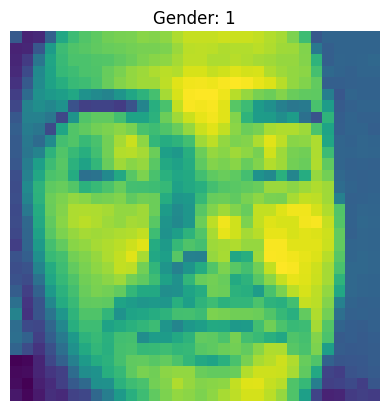

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

rand_index = random.randint(0, len(data))
# Assuming df['data'][rand_index] contains a NumPy array representing an image
image_array = df['data'][rand_index]

# Convert the NumPy array to a PIL Image
image_pil = Image.fromarray(np.uint8(image_array))
# Display the image using Matplotlib
plt.title(f'Gender: {df["target"][rand_index]}')
plt.axis('off')
plt.imshow(image_pil)
plt.show()


<Axes: xlabel='target', ylabel='Density'>

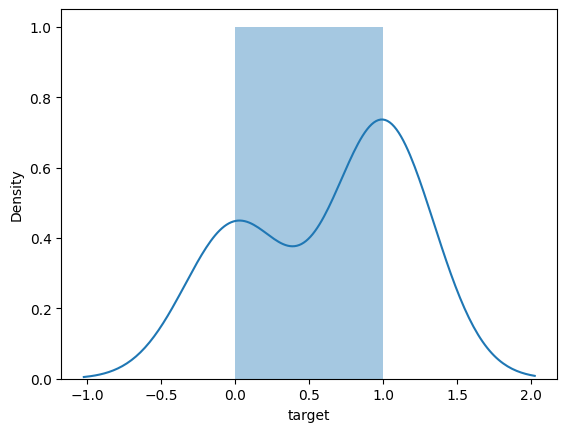

In [ ]:
 # Age distribution
 sns.distplot(df['target'])



# **extract_image_features**



In [ ]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

# **loadding Data in files **

In [ ]:
import numpy as np

data=np.load('./training/data.npy')
target=np.load('./training/target.npy')

# CNN Model **Architecture**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


noOfFilters=64
sizeOfFilter1=(3,3)
sizeOfFilter2=(3,3)
sizeOfPool=(2,2)
noOfNode=64



model=Sequential()
model.add((Conv2D(32, sizeOfFilter1, input_shape=data.shape[1:],activation='relu')))
model.add((Conv2D(32, sizeOfFilter1,activation='relu')))
model.add(MaxPooling2D(pool_size=sizeOfPool))

model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
model.add(MaxPooling2D(pool_size=sizeOfPool))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(noOfNode, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# **separate Data Into Train and test**

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

# Fiting Model

In [ ]:
checkpoint = ModelCheckpoint('./training/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
325/326 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.6907INFO:tensorflow:Assets written to: ./training\model-001.model\assets


INFO:tensorflow:Assets written to: ./training\model-001.model\assets


326/326 [==============================] - 27s 75ms/step - loss: 0.5356 - accuracy: 0.6908 - val_loss: 0.2678 - val_accuracy: 0.8926
Epoch 2/20
325/326 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.9106INFO:tensorflow:Assets written to: ./training\model-002.model\assets


INFO:tensorflow:Assets written to: ./training\model-002.model\assets


326/326 [==============================] - 23s 69ms/step - loss: 0.2390 - accuracy: 0.9106 - val_loss: 0.1792 - val_accuracy: 0.9344
Epoch 3/20
325/326 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9323INFO:tensorflow:Assets written to: ./training\model-003.model\assets


INFO:tensorflow:Assets written to: ./training\model-003.model\assets


326/326 [==============================] - 22s 68ms/step - loss: 0.1865 - accuracy: 0.9323 - val_loss: 0.1552 - val_accuracy: 0.9463
Epoch 4/20
326/326 [==============================] - ETA: 0s - loss: 0.1649 - accuracy: 0.9407INFO:tensorflow:Assets written to: ./training\model-004.model\assets


INFO:tensorflow:Assets written to: ./training\model-004.model\assets


326/326 [==============================] - 24s 73ms/step - loss: 0.1649 - accuracy: 0.9407 - val_loss: 0.1414 - val_accuracy: 0.9517
Epoch 5/20
325/326 [============================>.] - ETA: 0s - loss: 0.1492 - accuracy: 0.9450INFO:tensorflow:Assets written to: ./training\model-005.model\assets


INFO:tensorflow:Assets written to: ./training\model-005.model\assets


326/326 [==============================] - 23s 70ms/step - loss: 0.1490 - accuracy: 0.9451 - val_loss: 0.1362 - val_accuracy: 0.9497
Epoch 6/20
325/326 [============================>.] - ETA: 0s - loss: 0.1382 - accuracy: 0.9492INFO:tensorflow:Assets written to: ./training\model-006.model\assets


INFO:tensorflow:Assets written to: ./training\model-006.model\assets


326/326 [==============================] - 24s 74ms/step - loss: 0.1380 - accuracy: 0.9493 - val_loss: 0.1288 - val_accuracy: 0.9547
Epoch 7/20
326/326 [==============================] - 19s 58ms/step - loss: 0.1298 - accuracy: 0.9520 - val_loss: 0.1504 - val_accuracy: 0.9451
Epoch 8/20
326/326 [==============================] - ETA: 0s - loss: 0.1237 - accuracy: 0.9538INFO:tensorflow:Assets written to: ./training\model-008.model\assets


INFO:tensorflow:Assets written to: ./training\model-008.model\assets


326/326 [==============================] - 22s 67ms/step - loss: 0.1237 - accuracy: 0.9538 - val_loss: 0.1284 - val_accuracy: 0.9543
Epoch 9/20
326/326 [==============================] - 19s 59ms/step - loss: 0.1149 - accuracy: 0.9580 - val_loss: 0.1343 - val_accuracy: 0.9547
Epoch 10/20
325/326 [============================>.] - ETA: 0s - loss: 0.1124 - accuracy: 0.9558INFO:tensorflow:Assets written to: ./training\model-010.model\assets


INFO:tensorflow:Assets written to: ./training\model-010.model\assets


326/326 [==============================] - 24s 74ms/step - loss: 0.1122 - accuracy: 0.9559 - val_loss: 0.1257 - val_accuracy: 0.9589
Epoch 11/20
326/326 [==============================] - 20s 60ms/step - loss: 0.1039 - accuracy: 0.9622 - val_loss: 0.1346 - val_accuracy: 0.9570
Epoch 12/20
325/326 [============================>.] - ETA: 0s - loss: 0.1006 - accuracy: 0.9638INFO:tensorflow:Assets written to: ./training\model-012.model\assets


INFO:tensorflow:Assets written to: ./training\model-012.model\assets


326/326 [==============================] - 24s 73ms/step - loss: 0.1007 - accuracy: 0.9637 - val_loss: 0.1203 - val_accuracy: 0.9551
Epoch 13/20
326/326 [==============================] - 19s 58ms/step - loss: 0.0981 - accuracy: 0.9667 - val_loss: 0.1274 - val_accuracy: 0.9547
Epoch 14/20
326/326 [==============================] - 19s 58ms/step - loss: 0.0934 - accuracy: 0.9660 - val_loss: 0.1233 - val_accuracy: 0.9555
Epoch 15/20
326/326 [==============================] - 19s 60ms/step - loss: 0.0937 - accuracy: 0.9656 - val_loss: 0.1229 - val_accuracy: 0.9616
Epoch 16/20
326/326 [==============================] - 19s 58ms/step - loss: 0.0913 - accuracy: 0.9660 - val_loss: 0.1212 - val_accuracy: 0.9601
Epoch 17/20
326/326 [==============================] - 19s 59ms/step - loss: 0.0822 - accuracy: 0.9694 - val_loss: 0.1348 - val_accuracy: 0.9532
Epoch 18/20
326/326 [==============================] - 19s 58ms/step - loss: 0.0823 - accuracy: 0.9698 - val_loss: 0.1470 - val_accuracy: 0.95

# Testing **Model**

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
model = load_model('./training/model-019.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)

labels_dict={0:'Male',1:'Female'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [ ]:
X = int(input(" Enter number  1 for Know gender from photo or 2 from real camera :   "))


In [ ]:
while(True):

    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,3)

    for (x,y,w,h) in faces:

        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(32,32))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,32,32,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]

        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)


    cv2.imshow('Result',img)
    k=cv2.waitKey(1)

    if k==ord("q"):
        break

cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 49ms/step
